# Part 1

In [1]:
#1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn import datasets
import tensorflow as tf
import keras
import skimage
import itertools

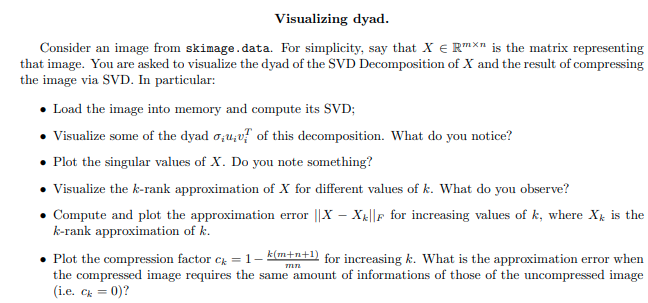

In [2]:
# Loading the "cameraman" image
X = skimage.data.camera()

# Printing its shape
print(f"Shape of the image: {X.shape}.")

Shape of the image: (512, 512).


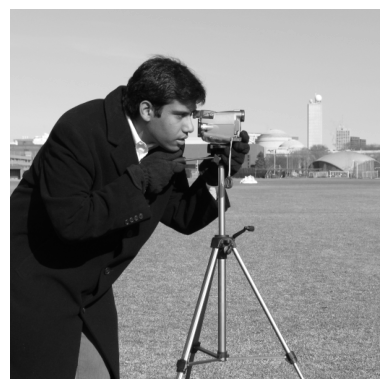

In [3]:
# Visualize the image
import matplotlib.pyplot as plt

plt.imshow(X, cmap="gray")
plt.axis('off')
plt.show()

In [4]:
# svd decomp
U, s, VT = np.linalg.svd(X, full_matrices=True)
print(U.shape, s.shape, VT.shape)

(512, 512) (512,) (512, 512)


In [5]:
#visualize the diad
for i in range(2):
    ui = U[:,i:i + 1]
    vit = VT[i:i+1,:] 
    print(s[i] * (ui @ vit))

[[167.20045954 166.6115525  166.49077317 ... 227.26986471 227.58326146
  226.48628752]
 [167.33916028 166.74976472 166.62888519 ... 227.45839589 227.77205262
  226.67416869]
 [167.48891131 166.8989883  166.7780006  ... 227.66194734 227.97588476
  226.87701833]
 ...
 [109.67347227 109.28718458 109.20796058 ... 149.07539892 149.28096839
  148.56141929]
 [111.3683749  110.97611748 110.89566915 ... 151.37922208 151.58796844
  150.85729936]
 [110.33360785 109.94499505 109.8652942  ... 149.97269863 150.17950544
  149.4556253 ]]
[[ 44.05921036  44.23854545  44.35918574 ... -10.18353509 -10.55641061
   -9.83447033]
 [ 44.06484107  44.24419908  44.36485478 ... -10.18483653 -10.55775971
   -9.83572716]
 [ 44.08645771  44.26590371  44.3866186  ... -10.18983285 -10.56293897
   -9.84055222]
 ...
 [-35.54527622 -35.68995688 -35.78728482 ...   8.21568441   8.51650604
    7.93407239]
 [-34.84598167 -34.98781597 -35.08322914 ...   8.0540544    8.34895786
    7.77798263]
 [-33.28178232 -33.41724983 -33.

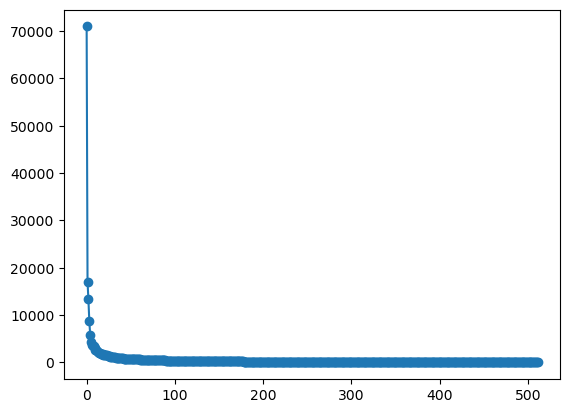

In [6]:
# plot singular values of x)
x = range(len(s))
y = s
plt.plot(x,y)
plt.scatter(range(len(s)),s)


In [7]:
#visualize krank aprox
def Krank_approx(A, k): #visualization function
    U, s, VT = np.linalg.svd(A, full_matrices=True)
    m, n = A.shape
    S = np.zeros((m, n))
    S[:n, :n] = np.diag(s)
    A_hat = np.zeros((m, n))
    A_hat = U[:, :k] @ S[:k, :k] @ VT[:k, :]
    return A_hat



The residual matrix has 2-norm: 4350.94629
The compression factor is: 0.980


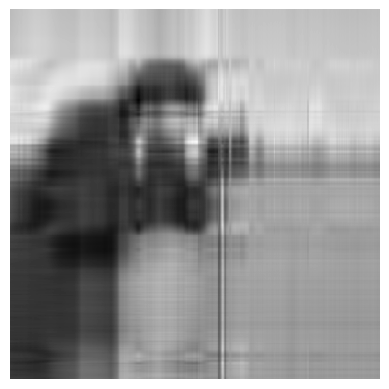

In [8]:
k = 5
m, n = X.shape
X_hat = Krank_approx(X, k)
print(f"The residual matrix has 2-norm: {np.linalg.norm(X - X_hat, 2):.5f}")
print(f"The compression factor is: {1-k*(m+n+1)/(m*n):.3f}")
plt.imshow(X_hat, cmap="gray")
plt.axis('off')
plt.show()

The residual matrix has 2-norm: 1349.24751
The compression factor is: 0.902


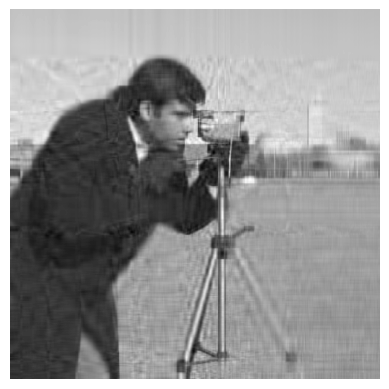

In [9]:
k = 25
m, n = X.shape
X_hat = Krank_approx(X, k)
print(f"The residual matrix has 2-norm: {np.linalg.norm(X - X_hat, 2):.5f}")
print(f"The compression factor is: {1-k*(m+n+1)/(m*n):.3f}")
plt.imshow(X_hat, cmap="gray")
plt.axis('off')
plt.show()

The residual matrix has 2-norm: 746.01642
The compression factor is: 0.804


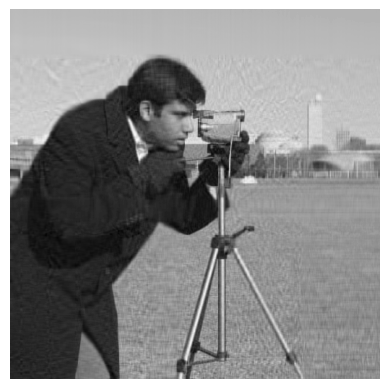

In [10]:
k = 50
m, n = X.shape
X_hat = Krank_approx(X, k)
print(f"The residual matrix has 2-norm: {np.linalg.norm(X - X_hat, 2):.5f}")
print(f"The compression factor is: {1-k*(m+n+1)/(m*n):.3f}")
plt.imshow(X_hat, cmap="gray")
plt.axis('off')
plt.show()

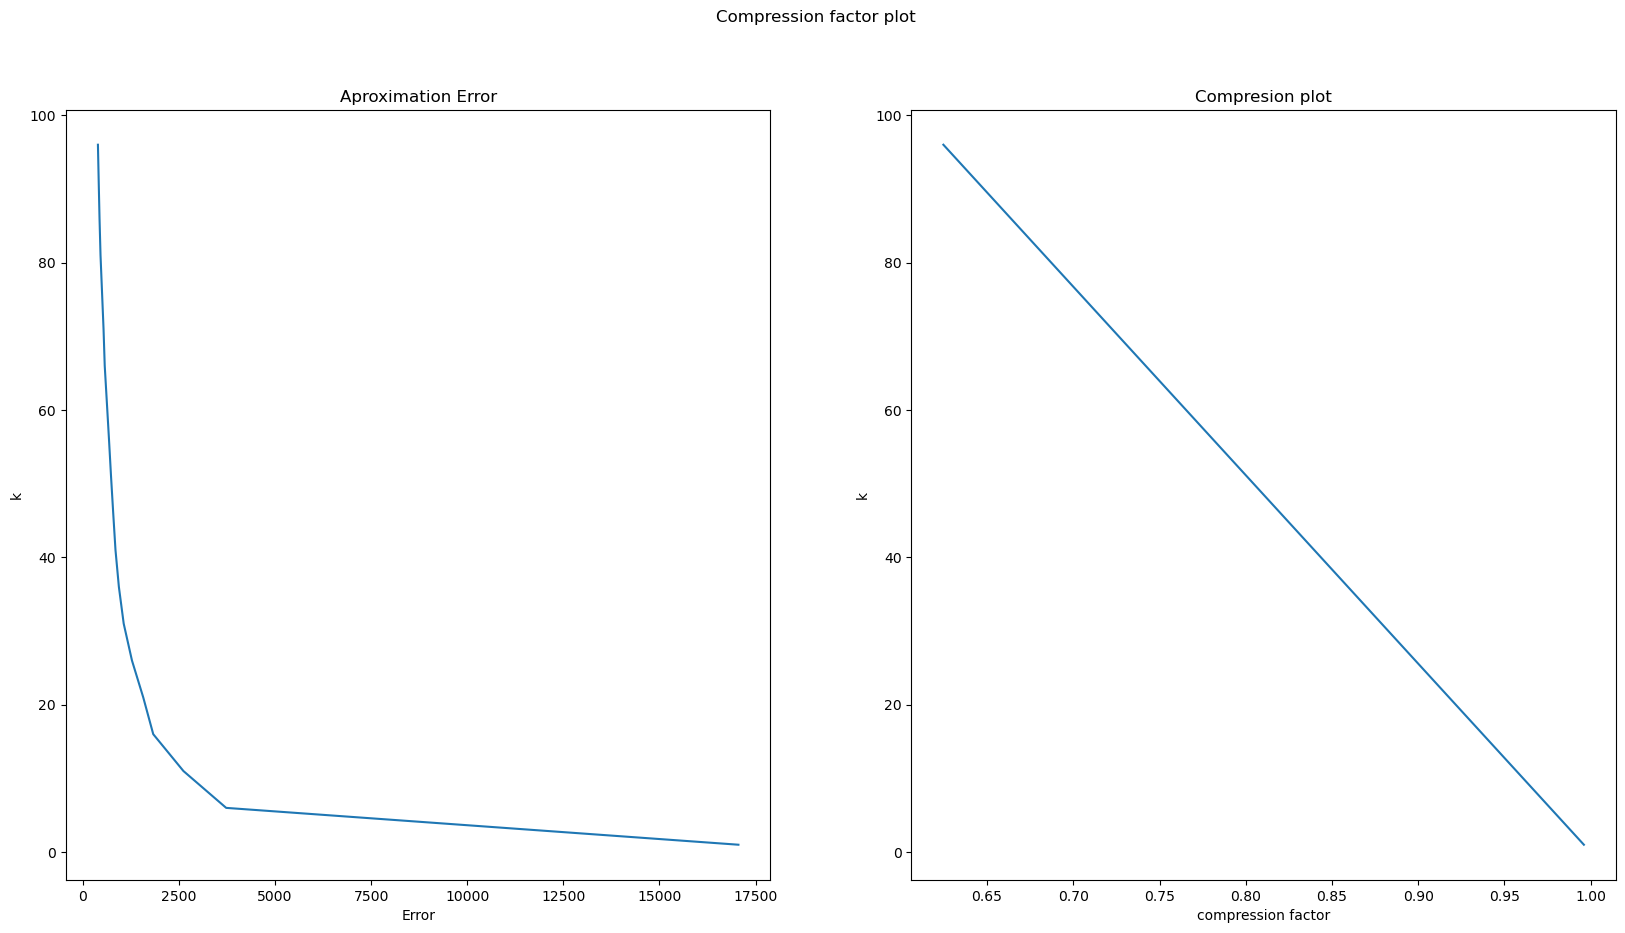

In [11]:
k_vect = range(1,100,5)
compresion_fact = []
approximation_err = []


for k in k_vect:
    m, n = X.shape
    
    X_hat = Krank_approx(X, k)
    approx_err = np.linalg.norm(X - X_hat, 2)
    compression_factor = 1-k*(m+n+1)/(m*n)
    
    approximation_err.append(approx_err)
    compresion_fact.append(compression_factor)
    

plt.figure(figsize=(20,10))
plt.suptitle("Relative error and condition number")
plt.subplot(1,2,1)
plt.plot(approximation_err,k_vect)
plt.title("Aproximation Error")
plt.xlabel("Error")
plt.ylabel("k") 

plt.subplot(1,2,2)
plt.suptitle("Compression factor plot")
plt.plot(compresion_fact,k_vect)
plt.title("Compresion plot")
plt.xlabel("compression factor")
plt.ylabel("k")

plt.show()

# Part 2

In [12]:
#helper functions:
def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[:, idx]
    
    # Reshape it
    img = np.reshape(img, (28, 28))

    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()

def train_split_data(X, Y, percent_train):
    N, d = X.shape  # Note that N: number of samples, d: number of features
    Ntrain = int(X.shape[0] * percent_train)

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[train_idx, :]
    Ytrain = Y[train_idx]
    
    Xtest = X[test_idx, :]
    Ytest = Y[test_idx]


    return (Xtrain, Ytrain), (Xtest, Ytest)

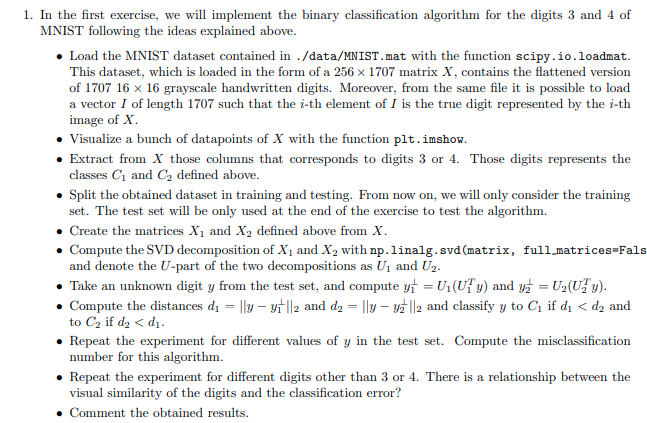

In [13]:
data = pd.read_csv('data/data.csv') #take it from virtuale page. last thingy on the statistics

(784, 42000) (42000,)


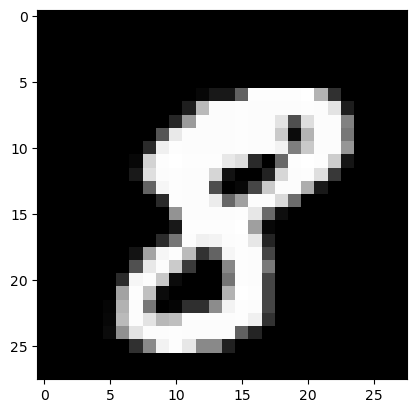

The associated digit is: 8


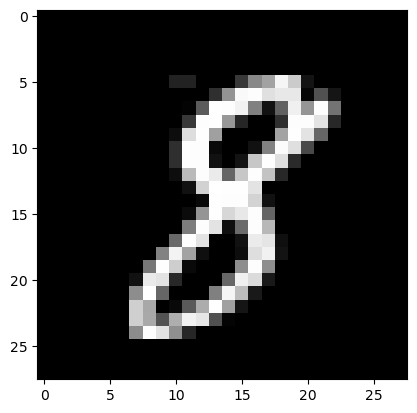

The associated digit is: 8


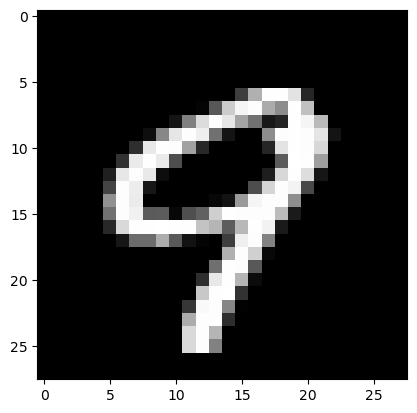

The associated digit is: 9


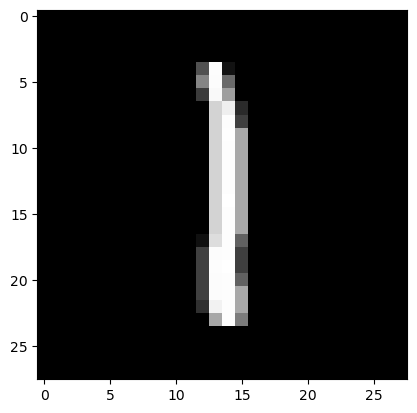

The associated digit is: 1


In [14]:
# Convert data into a matrix
data = np.array(data)

# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimension (42000, )
# Y is the first column of data, while X is the rest
X = data[:, 1:]
X = X.T

Y = data[:, 0]

print(X.shape, Y.shape)

import matplotlib.pyplot as plt



# Visualize image number 10 and the corresponding digit.
idx = 10
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")
visualize(X, 20)
print(f"The associated digit is: {Y[20]}")
visualize(X, 100)
print(f"The associated digit is: {Y[100]}")

visualize(X, 1000)
print(f"The associated digit is: {Y[1000]}")




In [15]:
# spliting the X based on the label

X = data[(Y == 3) | (Y == 4)]
y = X[:, 0]
X = X[:, 1:]
print(X.shape, y.shape)

X1 = X[(y == 3)]
X2 = X[(y == 4)]

y1 = y[(y == 3)]
y2 = y[(y == 4)]

print(X1.shape,X2.shape, y1.shape, y2.shape)



(8423, 784) (8423,)
(4351, 784) (4072, 784) (4351,) (4072,)


In [16]:
# split the data

(X1_train, y1_train), (X1_test, y1_test) = train_split_data(X1, y1, 0.8)
(X2_train, y2_train), (X2_test, y2_test) = train_split_data(X2, y2, 0.8)

print(X1_train.shape, X1_test.shape)
(X_train, y_train), (X_test, y_test) = train_split_data(X, y, 0.8)

(3480, 784) (871, 784)


In [17]:
# Create SVD decomp of X1 and X2

U1, s1, VT1 = np.linalg.svd(X1_train, full_matrices = False)
U2, s2, VT2 = np.linalg.svd(X2_train, full_matrices = False)

U1 = U1.T
U2 = U2.T

the distance between d1 and X1 is 7.052568495230048e-12
the distance between d2 and X2 is 7.539625834783784e-12


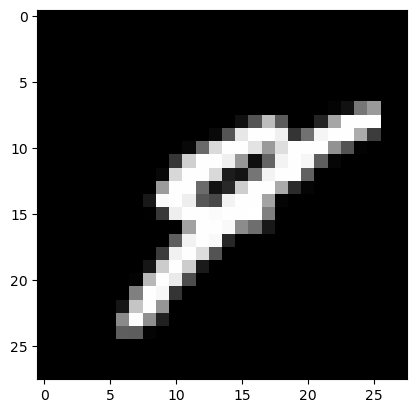

Classes are: C1: 3 and C2: 4
Random sample index: 1094, Classified as: C1


In [18]:
## take a random digit and classify it.
import random
random_index = random.randint(0, X_test.shape[0] - 1)
y_rand = X_test[random_index, :]

# No need to reshape if we are treating it as a 1D array for norm calculation,
# but if y_rand needs to be 2D column vector for matrix multiplication, then do the following:
y_rand = y_rand[:, np.newaxis]


#compute the projection of y on the 2 ortonormal basis

y1T = U1 @ (U1.T @ y_rand)
y2T = U2 @ (U2.T @ y_rand)


# Calculating distances
d1 = np.linalg.norm(y_rand - y1T)  # ||y - y1T||2
d2 = np.linalg.norm(y_rand - y2T)  # ||y - y2T||2

print(f"the distance between d1 and X1 is {d1}")
print(f"the distance between d2 and X2 is {d2}")

classification = ""
# Classification
if d1 < d2:
    classification = "C1"
else:
    classification = "C2"

visualize(X.T, random_index)
print(f"Classes are: C1: 3 and C2: 4")
print(f"Random sample index: {random_index}, Classified as: {classification}")

In [19]:
def classify_digit(y, digit1, digit2, U1, U2):
    
    y1_perp = U1 @ (U1.T @ y)
    y2_perp = U2 @ (U2.T @ y)
    
    #compute the distance
    d1 = np.linalg.norm(y - y1_perp)
    d2 = np.linalg.norm(y - y2_perp)
    
    return digit1 if (d1 < d2) else digit2

In [20]:
def perform_experiments(digit_1, digit_2):
    # Get the right dataset for the digits
    X = data[(Y == digit_1) | (Y == digit_2)]
    y = X[:, 0]
    X = X[:, 1:]
    
    X1 = X[(y == digit_1)]
    X2 = X[(y == digit_2)]

    y1 = y[(y == digit_1)]
    y2 = y[(y == digit_2)]
    
    (X1_train, y1_train), (X1_test, y1_test) = train_split_data(X1, y1, 0.8)
    (X2_train, y2_train), (X2_test, y2_test) = train_split_data(X2, y2, 0.8)
    
    X1_train = X1_train.T
    X2_train = X2_train.T
    
    U1, _, _ = np.linalg.svd(X1_train, full_matrices = False)
    U2, _, _ = np.linalg.svd(X2_train, full_matrices = False) 
    
    # Combine the test data and labels
    X_test = np.concatenate((X1_test, X2_test))
    y_test = np.concatenate((y1_test, y2_test))

    accurate_clasif = 0
    total_test_size = len(X_test)

    for i in range(total_test_size):
        y = X_test[i, :]
        true_label = y_test[i]
        
        # Classify the digit 'y' using the two subspaces
        classified_label = classify_digit(y, digit_1, digit_2, U1, U2)
        
        if classified_label == true_label:
            accurate_clasif += 1

    accuracy = accurate_clasif / total_test_size
    
    return accuracy

In [21]:
def two_digit_combinations():
    combinations = list(itertools.combinations(range(10), 2))
    return combinations

In [22]:
digit_pairs = two_digit_combinations()


for pair in digit_pairs:
    digit_1, digit_2 = pair
    
    # Generate U1 and U2 for each pair - not shown here
    
    # Filter the test set for the current pair of digits
    
    # Calculate the misclassification rate for the current pair
    misclassification_rate = perform_experiments(digit_1, digit_2)
    
    print(f"Digit Pair: {pair}, Accuracy: {misclassification_rate:.2f}")


Digit Pair: (0, 1), Accuracy: 0.97
Digit Pair: (0, 2), Accuracy: 0.70
Digit Pair: (0, 3), Accuracy: 0.94
Digit Pair: (0, 4), Accuracy: 0.98
Digit Pair: (0, 5), Accuracy: 0.76
Digit Pair: (0, 6), Accuracy: 0.96
Digit Pair: (0, 7), Accuracy: 0.92
Digit Pair: (0, 8), Accuracy: 0.93
Digit Pair: (0, 9), Accuracy: 0.94
Digit Pair: (1, 2), Accuracy: 0.75
Digit Pair: (1, 3), Accuracy: 0.89
Digit Pair: (1, 4), Accuracy: 0.97
Digit Pair: (1, 5), Accuracy: 0.98
Digit Pair: (1, 6), Accuracy: 0.64
Digit Pair: (1, 7), Accuracy: 0.92
Digit Pair: (1, 8), Accuracy: 0.42
Digit Pair: (1, 9), Accuracy: 0.96
Digit Pair: (2, 3), Accuracy: 0.87
Digit Pair: (2, 4), Accuracy: 0.94
Digit Pair: (2, 5), Accuracy: 0.75
Digit Pair: (2, 6), Accuracy: 0.90
Digit Pair: (2, 7), Accuracy: 0.83
Digit Pair: (2, 8), Accuracy: 0.90
Digit Pair: (2, 9), Accuracy: 0.89
Digit Pair: (3, 4), Accuracy: 0.94
Digit Pair: (3, 5), Accuracy: 0.84
Digit Pair: (3, 6), Accuracy: 0.51
Digit Pair: (3, 7), Accuracy: 0.95
Digit Pair: (3, 8), 

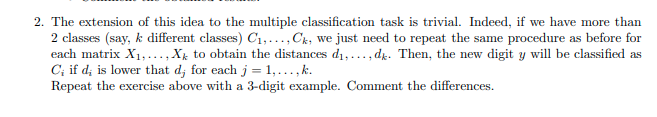

In [23]:
def classify_digit(y, digit1, digit2, digit3, U1, U2, U3):
    
    y1_perp = U1 @ (U1.T @ y)
    y2_perp = U2 @ (U2.T @ y)
    y3_perp = U3 @ (U3.T @ y)
    
    #compute the distance
    d1 = np.linalg.norm(y - y1_perp)
    d2 = np.linalg.norm(y - y2_perp)
    d3 = np.linalg.norm(y - y3_perp)
    
    if d1 < d2:
        return digit1
    elif d2 < d3 and d1 > 2:
        return digit2
    else:
        return digit3

In [24]:
def perform_experiments(digit_1, digit_2, digit_3):
    # Get the right dataset for the digits
    X = data[(Y == digit_1) | (Y == digit_2) | (Y == digit_3)]
    y = X[:, 0]
    X = X[:, 1:]
    
    X1 = X[(y == digit_1)]
    X2 = X[(y == digit_2)]
    X3 = X[(y == digit_3)]

    y1 = y[(y == digit_1)]
    y2 = y[(y == digit_2)]
    y3 = y[(y == digit_3)]
    
    (X1_train, y1_train), (X1_test, y1_test) = train_split_data(X1, y1, 0.8)
    (X2_train, y2_train), (X2_test, y2_test) = train_split_data(X2, y2, 0.8)
    (X3_train, y3_train), (X3_test, y3_test) = train_split_data(X3, y3, 0.8)
    
    X1_train = X1_train.T
    X2_train = X2_train.T
    X3_train = X3_train.T

    
    U1, _, _ = np.linalg.svd(X1_train, full_matrices = False)
    U2, _, _ = np.linalg.svd(X2_train, full_matrices = False) 
    U3, _, _ = np.linalg.svd(X3_train, full_matrices = False) 

    
    # Combine the test data and labels
    X_test = np.concatenate((X1_test, X2_test,X3_test))
    y_test = np.concatenate((y1_test, y2_test,y3_test))

    accurate_clasif = 0
    total_test_size = len(X_test)

    for i in range(total_test_size):
        y = X_test[i, :]
        true_label = y_test[i]
        
        # Classify the digit 'y' using the two subspaces
        classified_label = classify_digit(y, digit_1, digit_2, digit_3, U1, U2,U3)
        
        if classified_label == true_label:
            accurate_clasif += 1

    accuracy = accurate_clasif / total_test_size
    
    return accuracy

In [25]:
digit_pairs = [(3, 4, 6),(8, 3, 9), (7, 1, 5)] # , 

for pair in digit_pairs:
    digit_1, digit_2, digit_3 = pair
    
    # Generate U1 and U2 for each pair - not shown here
    
    # Filter the test set for the current pair of digits
    
    # Calculate the misclassification rate for the current pair
    misclassification_rate = perform_experiments(digit_1, digit_2, digit_3)
    
    print(f"Digit Pair: {pair}, Accuracy: {misclassification_rate:.2f}")


Digit Pair: (3, 4, 6), Accuracy: 0.50
Digit Pair: (8, 3, 9), Accuracy: 0.32
Digit Pair: (7, 1, 5), Accuracy: 0.50


# Part 3

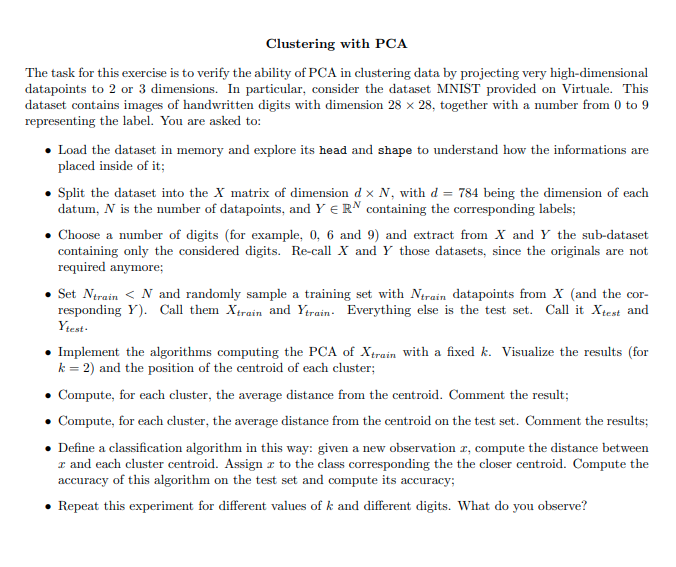

In [86]:
data = pd.read_csv('data/data.csv') 



In [87]:
# Inspect the data
print(f"Shape of the data: {data.shape}")
print("")
print(data.head())
print(data.shape)

Shape of the data: (42000, 785)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783

In [88]:
#Preprocessing
data = data[(data.label == 0) | (data.label == 6) | (data.label == 9)] # only take 3,6,9 labels
# Convert data into a matrix
data = np.array(data)

# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)
# Y is dimension (42000, )
# Y is the first column of data, while X is the rest



X = data[:, 1:]
X = X.T

Y = data[:, 0]

print(X.shape, Y.shape)

d, N = X.shape

(784, 12457) (12457,)


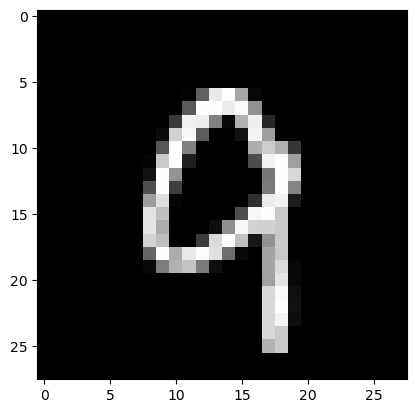

The associated digit is: 9


In [89]:
import matplotlib.pyplot as plt

def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[:, idx]
    
    # Reshape it
    img = np.reshape(img, (28, 28))

    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize image number 10 and the corresponding digit.
idx = 10
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

# Split the data

In [93]:
#define a function called train_test_split(X,Y,N_Train) such that
#given x and y, returns 4 arays. X_train, y_train, X_test, y_test
#where
#X_train Ntrain points randomly selected form x
#y_train the y associated labels from the x_train
# x_test and y_test - the remaining points and assoc labels

def train_split_data(X, Y, percent_train):
    _, N = X.shape  # Note that N: number of samples, d: number of features
    Ntrain = int(N * percent_train)

    idx = np.arange(N)
    np.random.shuffle(idx)

    train_idx = idx[:Ntrain]
    test_idx = idx[Ntrain:]

    Xtrain = X[:, train_idx]
    Ytrain = Y[train_idx]
    
    Xtest = X[:,test_idx]
    Ytest = Y[test_idx]


    return (Xtrain, Ytrain), (Xtest, Ytest)

# Test it
(Xtrain, Ytrain), (Xtest, Ytest) = train_split_data(X, Y, 0.8)

print(Xtrain.shape, Xtest.shape)

(784, 9965) (784, 2492)


In [94]:
# define a function centroid(x) that takes as input a dataset of shape
# [d,N] and returns the centroid of the dataset which has the shape [d,1]
centroid = np.zeros(N)
def centroid(X):
    centroid = np.mean(X, axis = 1, keepdims=True)
    return centroid
    


In [95]:
X_train_centroid = centroid(Xtrain)
print(X_train_centroid.shape)

(784, 1)


In [96]:
# use the centroid of X_train by substracting X_train from its centroid.
Xc = Xtrain - X_train_centroid

#check if centered
print(f"Centroid of X is; {np.linalg.norm(centroid(Xc))}")

Centroid of X is; 1.4057081025342005e-12


In [97]:
U, s, VT = np.linalg.svd(Xc, full_matrices = False)

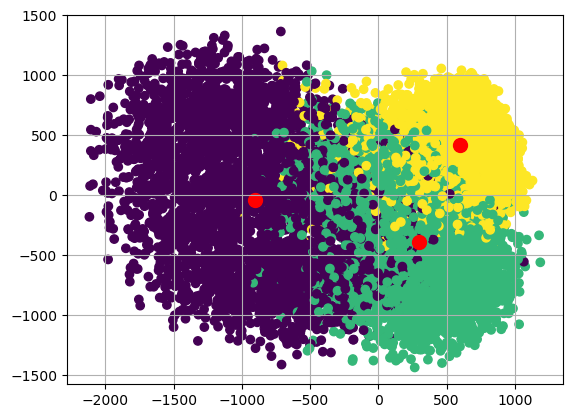

In [98]:
# Given k = 2, compute the k rank aproximation of X_K (only intersted in u_k)
#then, compute Zk = U_K.T @ Xc

k = 10

U_k= U[:, :k]

Z_k = U_k.T @ Xc

plt.scatter(Z_k[0,:], Z_k[1,:], c = Ytrain)

# Calculate and plot centroids for each class
unique_classes = np.unique(Ytrain)
for cls in unique_classes:
    class_data = Z_k[:, Ytrain == cls]
    class_centroid = centroid(class_data)
    plt.scatter(class_centroid[0, :], class_centroid[1, :], c='red', marker='o', s=100)

plt.grid()
plt.show()

(784, 9965)
(10, 2492) (2492,)


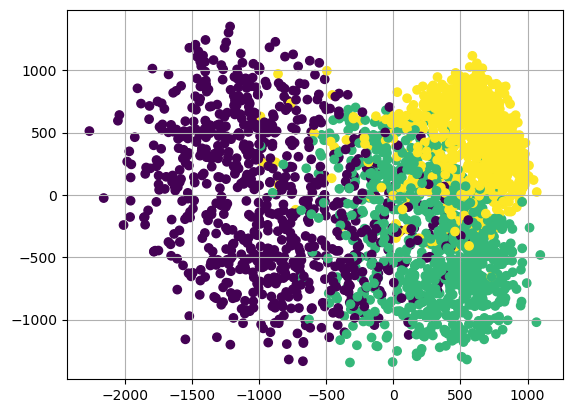

In [99]:
#mention about homework 2
#testing:
X_test_c = Xtest - centroid(Xtest)

#project
Z_test = U_k.T @ X_test_c
print(Xtrain.shape)

print(Z_test.shape, Ytest.shape)

plt.scatter(Z_test[0,:], Z_test[1,:], c = Ytest)
plt.grid()
plt.show()

In [100]:
# compute the average distance from each cluster to each points and comment the results

average_distances = {}

# Calculate average distance from centroid for each class
unique_classes = np.unique(Ytrain)
for cls in unique_classes:
    # Isolate the points of the current class in reduced space
    class_points = Z_k[:, Ytrain == cls]

    # Calculate the centroid of these points
    class_centroid = centroid(class_points)

    # Calculate distances from centroid
    distances = np.linalg.norm(class_points - class_centroid, axis=0)

    # Calculate average distance
    average_distance = np.mean(distances)
    average_distances[cls] = average_distance

# Print the average distances
for cls, avg_dist in average_distances.items():
    print(f"Class {cls}: Average distance from centroid = {avg_dist:.2f}")

# Plotting the results (optional)

Class 0: Average distance from centroid = 1300.52
Class 6: Average distance from centroid = 1115.89
Class 9: Average distance from centroid = 986.85


In [101]:
## on the test seturu

X_test_centroid = centroid(Xtest)
Xc_test = Xtest - X_test_centroid  # Centering the test set
Z_k_test = U_k.T @ Xc_test  # Projecting the test set

# Initialize a dictionary to hold average distances for the test set
average_distances_test = {}

# Calculate average distance from centroid for each class in the test set
unique_classes = np.unique(Ytest)
for cls in unique_classes:
    class_points_test = Z_k_test[:, Ytest == cls]
    class_centroid_test = centroid(class_points_test)
    distances_test = np.linalg.norm(class_points_test - class_centroid_test, axis=0)
    average_distance_test = np.mean(distances_test)
    average_distances_test[cls] = average_distance_test

# Print the average distances for the test set
for cls, avg_dist in average_distances_test.items():
    print(f"Class {cls} in Test Set: Average distance from centroid = {avg_dist:.2f}")

Class 0 in Test Set: Average distance from centroid = 1293.74
Class 6 in Test Set: Average distance from centroid = 1101.48
Class 9 in Test Set: Average distance from centroid = 1002.36


In [102]:
import numpy as np

# Assuming Xtrain, Ytrain, Xtest, Ytest, U_k are already defined

def centroid(X):
    return np.mean(X, axis=1, keepdims=True)

# Function to project data into reduced space
def project_to_reduced_space(X, U_k, centroid):
    X_centered = X - centroid
    return U_k.T @ X_centered

# Compute centroids for each class in the training set in reduced space
X_train_centroid = centroid(Xtrain)
Z_k_train = project_to_reduced_space(Xtrain, U_k, X_train_centroid)
class_centroids = {}
unique_classes = np.unique(Ytrain)

for cls in unique_classes:
    class_points = Z_k_train[:, Ytrain == cls]
    class_centroids[cls] = centroid(class_points)

# Classification algorithm
def classify(x, class_centroids, U_k, X_train_centroid):
    x_reduced = project_to_reduced_space(x.reshape(-1, 1), U_k, X_train_centroid)
    closest_class = min(class_centroids.keys(), key=lambda cls: np.linalg.norm(x_reduced - class_centroids[cls]))
    return closest_class

# Compute accuracy on the test set
correct_predictions = 0
for i in range(Xtest.shape[1]):
    predicted_class = classify(Xtest[:, i], class_centroids, U_k, X_train_centroid)
    if predicted_class == Ytest[i]:
        correct_predictions += 1

accuracy = correct_predictions / Xtest.shape[1]
print(f"Accuracy of the classification algorithm on the test set: {accuracy:.2f}")


Accuracy of the classification algorithm on the test set: 0.95
